<a href="https://colab.research.google.com/github/prw09/Customer-Behavior-Insights-through-EDA-in-Digital-Marketing/blob/main/Customer_Behavior_Insights_through_EDA_in_Digital_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/digital_marketing_campaign_dataset.csv')

In [ ]:
data.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [ ]:
data.shape

(8000, 20)

# **Data Cleaning**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [8]:
# Droping unnecessary columns
data.drop(columns = ['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool'],inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conversion         8000 

In [9]:
# Checking for null values

data.isnull().sum()

,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0
PagesPerVisit,0


In [ ]:
# Checking for duplicates

data.duplicated().sum()

0

In [ ]:
# Plotting the data for better understanding for distribution ...

data.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'Conversion'],
      dtype='object')

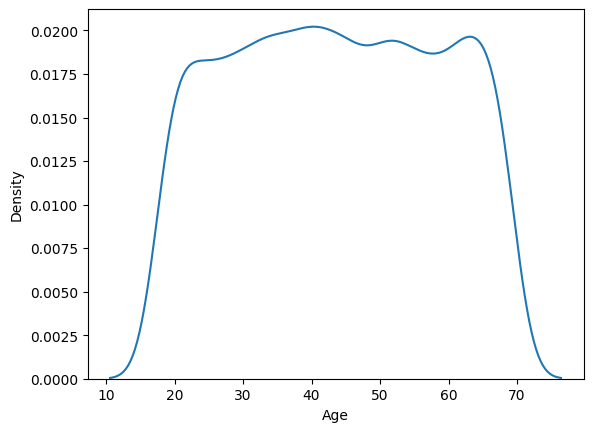

In [ ]:
sns.kdeplot(data['Age'])
plt.show()

In [3]:
numerical_data = data[['Income','AdSpend','ClickThroughRate',
                      'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
                      'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
                      'PreviousPurchases', 'LoyaltyPoints']]

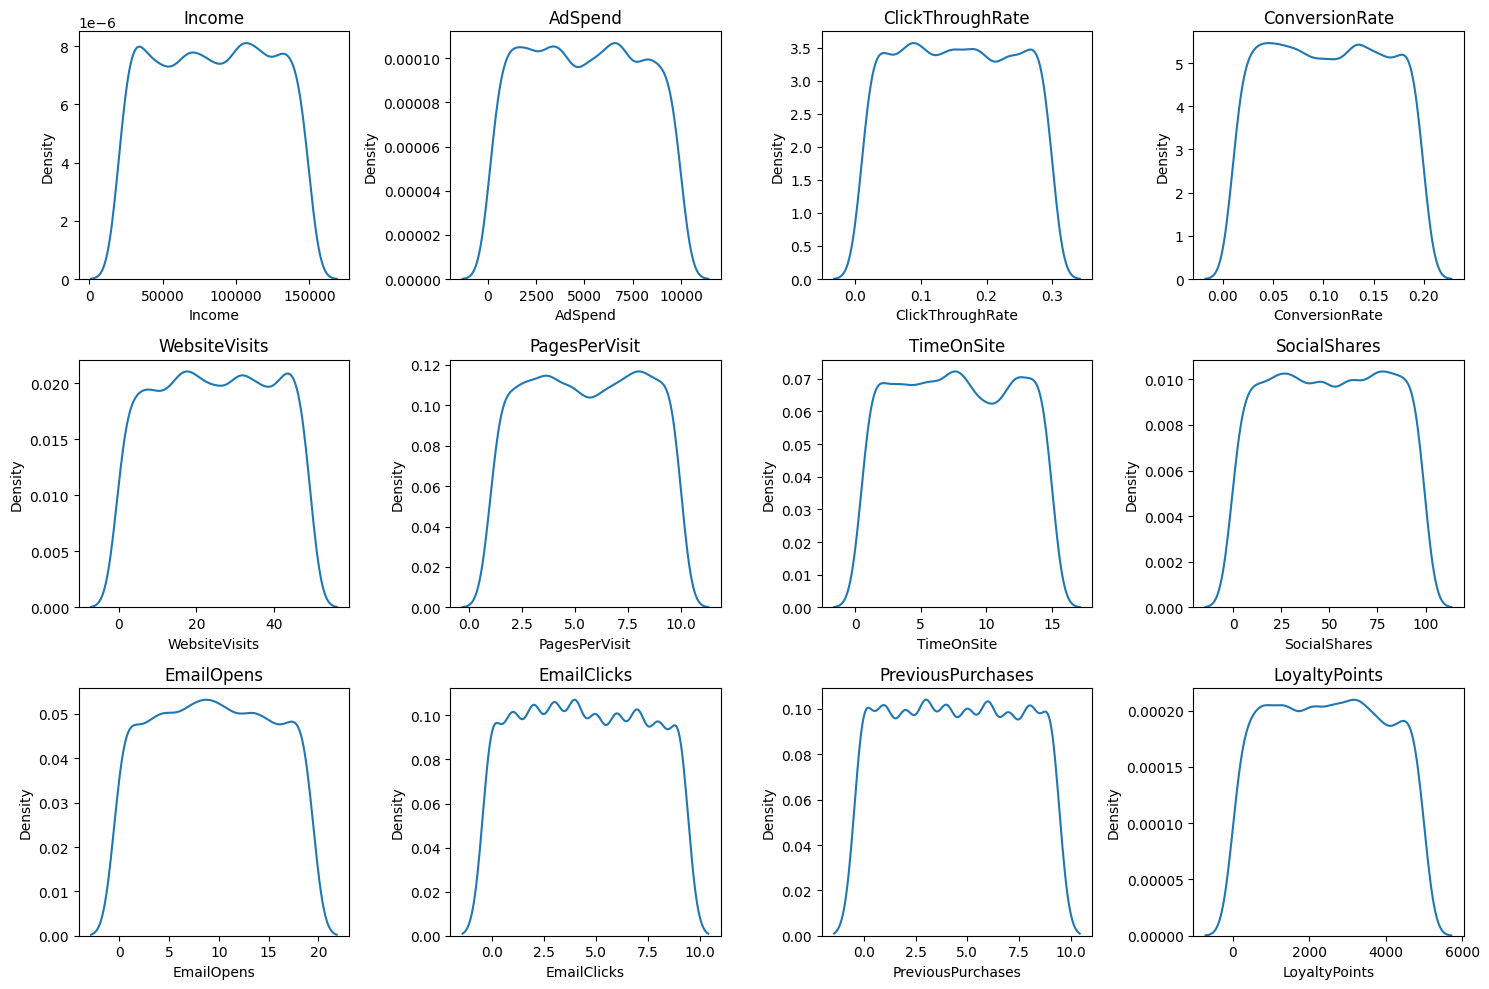

In [4]:
# Numerical data ditribution trough graphs ....

fid , axis = plt.subplots(3,4, figsize = (15,10))

axis = axis.flatten()

for i in range(len(numerical_data.columns)):
  sns.kdeplot(data = numerical_data[numerical_data.columns[i]], ax = axis[i])
  axis[i].set_title(numerical_data.columns[i])

plt.tight_layout()
plt.show()

# Here all the numerical data is even distributed not normally distributed

In [5]:
# All the categorical data columns

print(data['Gender'].value_counts())
print('')
print(' ')
print(data['CampaignChannel'].value_counts())
print('')
print(' ')
print(data['CampaignType'].value_counts())


Gender
Female    4839
Male      3161
Name: count, dtype: int64

 
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

 
CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64


# **Exploratory Data Analysis**

In [6]:
# FOR A PARTICULAR AGE GROUP WHICH CAMPAIGN-CHANNEL RESULT IN MAXIMUM PURCHASE BASED ON PAST DATA ...

In [11]:
data

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,0
7996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,0
7997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,1
7998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,1


In [16]:
def age_category(row):
  if row['Age'] < 12:
    return 'Child'
  elif 13 <=row['Age']<= 18:
    return 'Teen'
  elif 19 <=row['Age']<= 30:
    return 'Young Adult'
  elif row['Age']< 50:
    return 'Adult'
  else:
    return 'Senior Citizens'


In [18]:
data['Age_Category'] = data.apply(age_category, axis = 1)

In [22]:
# Updated dataset
data

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Age_Category
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1,Senior Citizens
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1,Senior Citizens
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1,Adult
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1,Adult
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1,Senior Citizens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,0,Young Adult
7996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,0,Adult
7997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,1,Young Adult
7998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,1,Young Adult


In [20]:
data.shape

(8000, 18)

In [26]:
# Grouping the data and sorting it to get the desired output ..

data.groupby(['Age_Category', 'CampaignChannel'])['PreviousPurchases'].mean().reset_index().sort_values(
    by=['Age_Category', 'PreviousPurchases'], ascending = False)

,Age_Category,CampaignChannel,PreviousPurchases
18,Young Adult,SEO,4.586510
15,Young Adult,Email,4.573727
17,Young Adult,Referral,4.402703
19,Young Adult,Social Media,4.247788
16,Young Adult,PPC,4.231198
14,Teen,Social Media,4.925926
13,Teen,SEO,4.800000
11,Teen,PPC,4.575758
10,Teen,Email,3.960000
12,Teen,Referral,3.575758


### CONCLUSIONS

- Teenagers and seniors are most effectively reached through social media campaigns. Teenagers naturally gravitate toward social media, while seniors increasingly use these platforms for connection and information and in their spare time.

- Young adults respond best to SEO-driven campaigns. This age group actively searches the internet for information and new discoveries, making SEO a crucial channel for capturing their attention and engagement.

- For adults, email campaigns are the most impactful. This demographic tends to engage more with personalized and direct communication, making email the optimal channel for marketing effort


In [27]:
# LETS SEE FOR PARTICULAR GENDER , AND PARTICULAR CAMPAIGN TYPE WHICH CAMPAIGN CHANNEL IS MOST EFFECTIVE(percentage)

In [29]:
data.groupby(['Gender', 'CampaignType', 'CampaignChannel'])['Conversion'].agg(['sum', 'size']).reset_index()

,Gender,CampaignType,CampaignChannel,sum,size
0,Female,Awareness,Email,188,233
1,Female,Awareness,PPC,211,243
2,Female,Awareness,Referral,235,269
3,Female,Awareness,SEO,193,231
4,Female,Awareness,Social Media,196,237
5,Female,Consideration,Email,204,236
6,Female,Consideration,PPC,210,240
7,Female,Consideration,Referral,213,248
8,Female,Consideration,SEO,190,224
9,Female,Consideration,Social Media,197,226


In [28]:
#effectiveness- percentage
#conversion/total